### Homework 9a
#### Mouselinos Spyridon
#### March 2020
****


In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
Dataset_a = sio.loadmat('HW9a.mat')
train_x_a = Dataset_a['train_X']
train_y_a = Dataset_a['train_y']
test_x_a = Dataset_a['test_X']
test_y_a = Dataset_a['test_y']

In [3]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out, Z

### Linear Kernel 
***

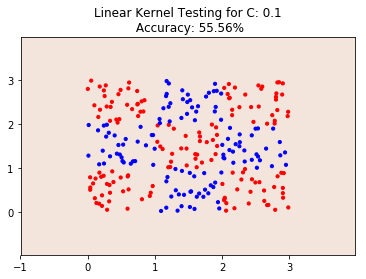

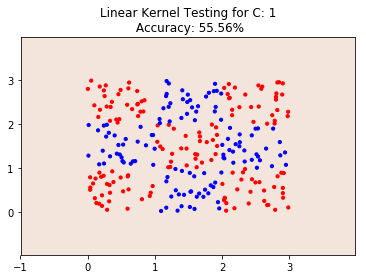

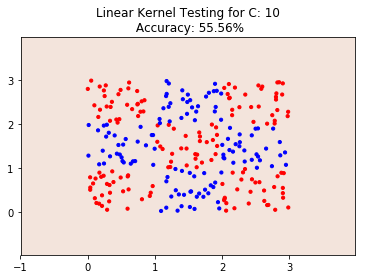

In [4]:
### For linear kernel only the parameter C (the slackness - l2 regularization) makes sense.
### So let's make a list of different values to try:

C_vector = [0.1 , 1, 10]
for C in C_vector:
    clf = svm.SVC(kernel='linear', C=C)
    ### Fit on Training Set
    clf.fit(train_x_a, train_y_a.reshape(270))
    ### Collect Results and Plot On Test Set.
    X00, X11 = test_x_a[:,0], test_x_a[:,1]
    xx, yy = make_meshgrid(X00, X11)
    fig, ax= plt.subplots(1, 1)
    
    color= ['red' if l == 1 else 'blue' for l in test_y_a.reshape(270)]
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.6)
    predictions = clf.predict(test_x_a)
    ax.title.set_text("Linear Kernel Testing for C: {}\n Accuracy: {}%".format(C,round(100 * accuracy_score(test_y_a.reshape(270), predictions),2)))
    ax.scatter(X00, X11, c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
    plt.show()
    plt.close()

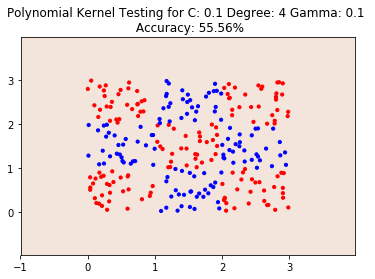

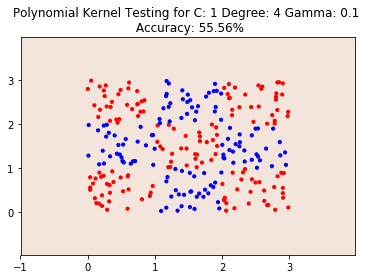

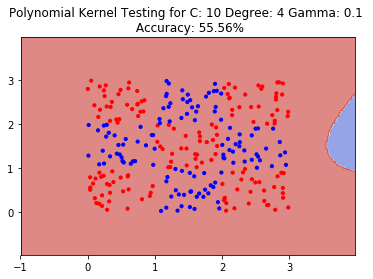

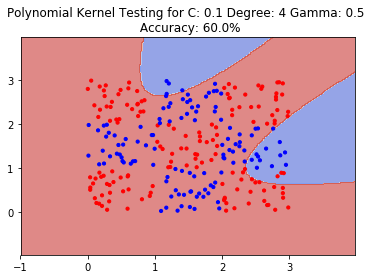

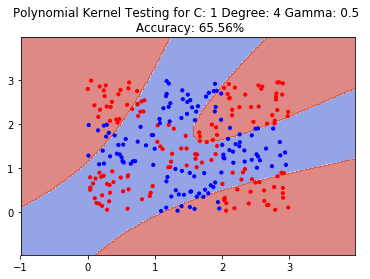

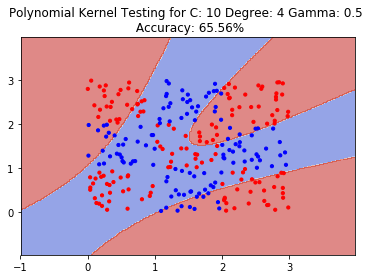

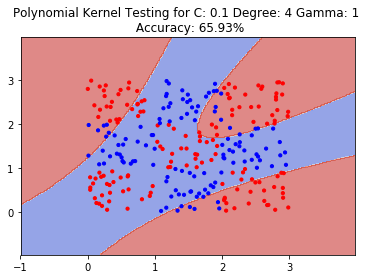

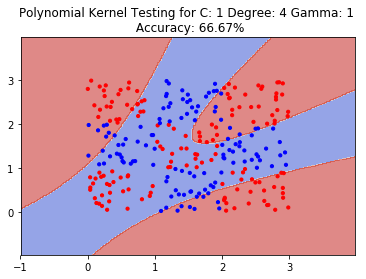

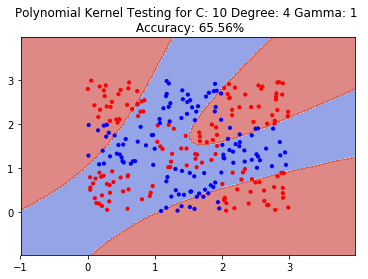

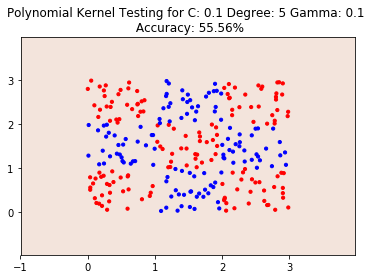

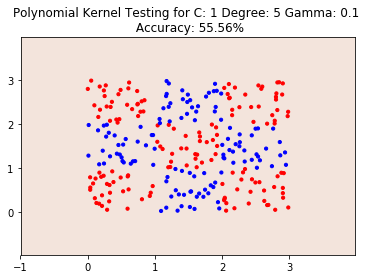

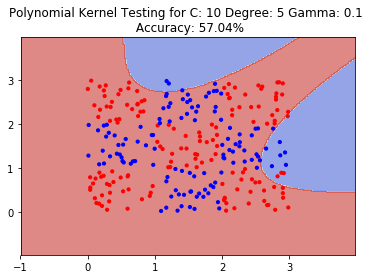

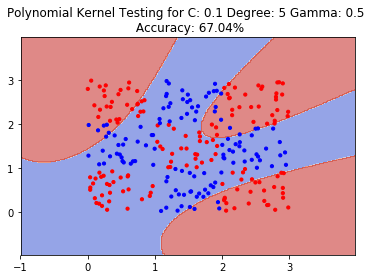

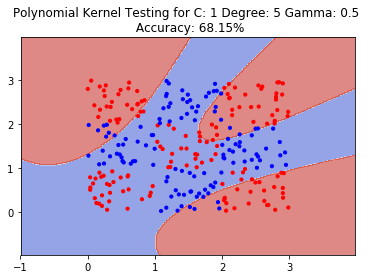

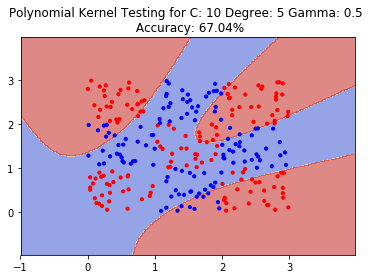

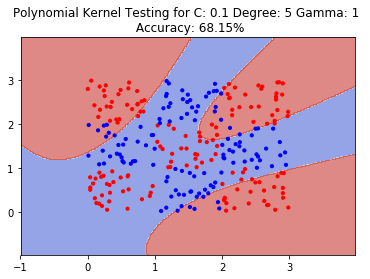

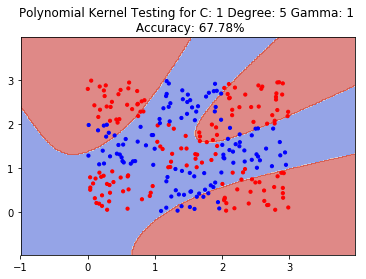

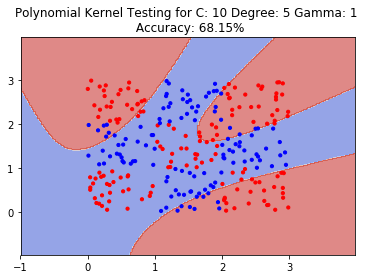

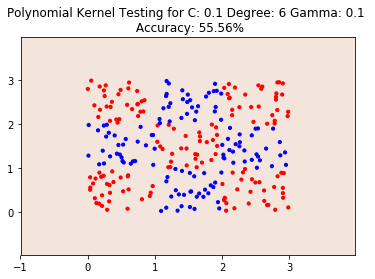

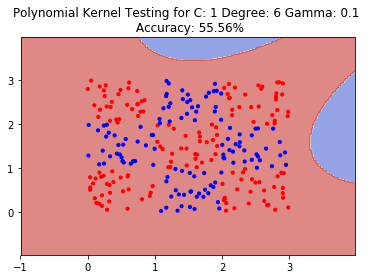

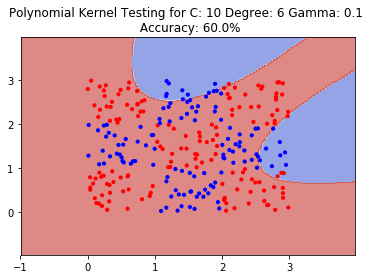

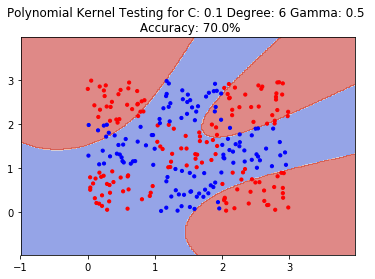

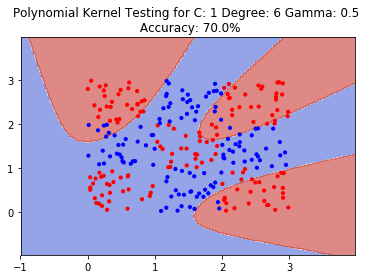

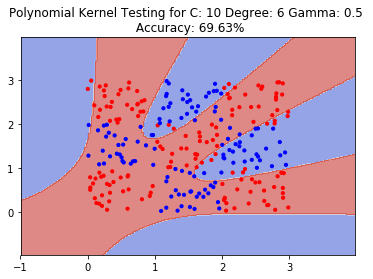

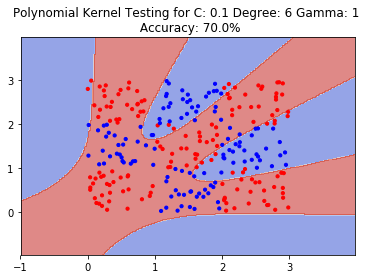

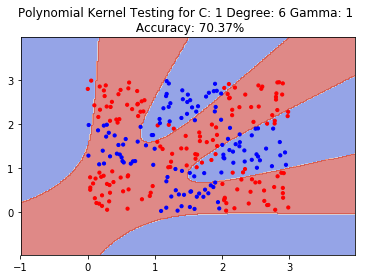

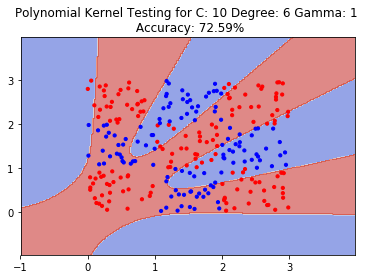

In [5]:
### For polynomial kernel the parameters C (the slackness - l2 regularization) as well as the degree of the assumed function and the gamma ( The sensitiviy per example of the kernel fit) make sense.
### So let's make a list of different values to try:

C_vector = [0.1 , 1, 10]
degrees = [4, 5, 6]
gammas = [0.1 , 0.5, 1]
for degree in degrees:
    for gamma in gammas:
        for C in C_vector:
            clf = svm.SVC(kernel='poly', C=C, degree=degree, gamma=gamma)
            ### Fit on Training Set
            clf.fit(train_x_a, train_y_a.reshape(270))
            ### Collect Results and Plot On Test Set.
            X00, X11 = test_x_a[:,0], test_x_a[:,1]
            xx, yy = make_meshgrid(X00, X11)
            fig, ax= plt.subplots(1, 1)

            color= ['red' if l == 1 else 'blue' for l in test_y_a.reshape(270)]
            plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.6)
            predictions = clf.predict(test_x_a)
            ax.title.set_text("Polynomial Kernel Testing for C: {} Degree: {} Gamma: {} \n Accuracy: {}%".format(C,degree,gamma,round(100 * accuracy_score(test_y_a.reshape(270), predictions),2)))
            ax.scatter(X00, X11, c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
            plt.show()
            plt.close()

### RBF Kernel
***

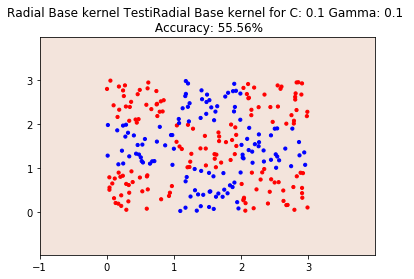

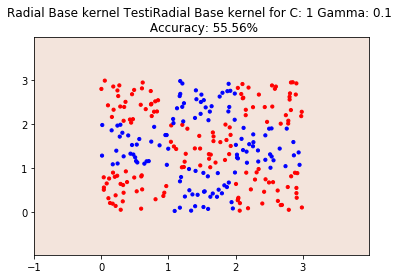

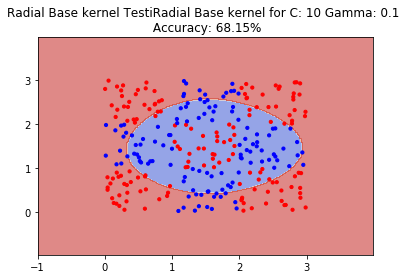

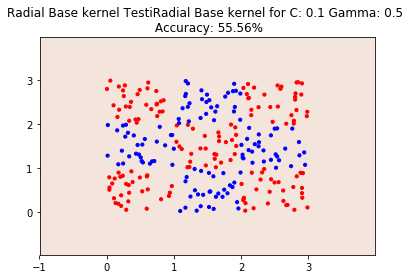

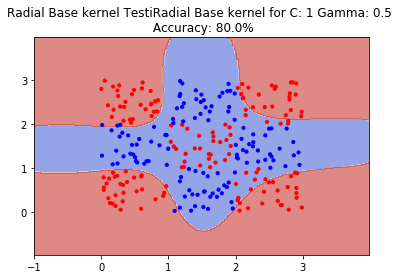

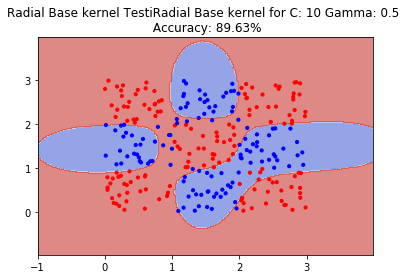

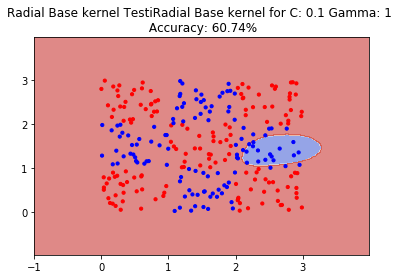

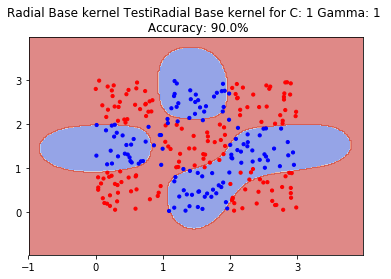

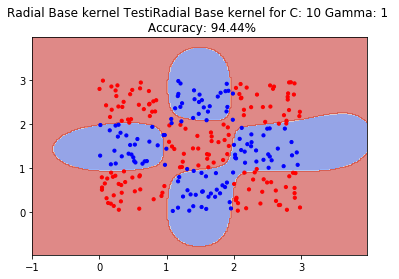

In [7]:
### For Radial Base kernel the parameters C (the slackness - l2 regularization) as well as the gammamake sense.
### So let's make a list of different values to try:

C_vector = [0.1 , 1, 10]
gammas = [0.1 , 0.5, 1]
for gamma in gammas:
    for C in C_vector:
        clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)
        ### Fit on Training Set
        clf.fit(train_x_a, train_y_a.reshape(270))
        ### Collect Results and Plot On Test Set.
        X00, X11 = test_x_a[:,0], test_x_a[:,1]
        xx, yy = make_meshgrid(X00, X11)
        fig, ax= plt.subplots(1, 1)

        color= ['red' if l == 1 else 'blue' for l in test_y_a.reshape(270)]
        plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.6)
        predictions = clf.predict(test_x_a)
        ax.title.set_text("Radial Base kernel TestiRadial Base kernel for C: {} Gamma: {} \n Accuracy: {}%".format(C,gamma,round(100 * accuracy_score(test_y_a.reshape(270), predictions),2)))
        ax.scatter(X00, X11, c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
        plt.show()
        plt.close()

### Comments on the exersize
***
* As we see here with kernel radial basis function we have better estimation about classification of two classes than other two kernel functions.
* In the linear and polynomial case the C parameter plays little role to the accuracy.
* In the polynomial case the degree parameter gives the accuracy boost.
* The best approach is with parameter  C=10 and gamma=1 with accurancy 94.44%.
* Large Values of C and Gamma are deceptive and prone to overfitting so we need to get our results from the test set only as we performed above.